# Key concepts:

* When trying to estimate the true value of a population mean, we can use a random sample from that population to calculate a confidence interval.
* The confidence interval gives a range of values that the true population mean is likely to fall within, based on the observed sample mean and the variability of the sample.
* By using a confidence level (such as 95% or 99%), we can quantify the degree of certainty that the true population mean falls within the calculated interval.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Set the random seed for reproducibility
np.random.seed(0)

### Confidence intervals for the mean:
* Known standard deviation
* Known population
$$ \bar{x} \pm Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}} $$
$$ (\bar{x} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}, \bar{x} + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}) $$

$$90 = \bar{x} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$


In [19]:
# 1-alpha = 0.98
# alpha = 0.02
# alpha_2 = 0.01

# The critical value for a two-tailed test
# with a 0.025 area in each tail is 1 - 0.01 = 0.99 

z_alpha_2 = norm.ppf(0.99)
print(f'z_alpha_2: {z_alpha_2}')
# probability
probability = norm.cdf(z_alpha_2) - norm.cdf(-1*z_alpha_2)
print(f'probability: {probability*100:.2f}%')

z_alpha_2: 2.3263478740408408
probability: 98.00%


In [2]:
for i in range(1, 5):
    print(1/1000**i)

0.001
1e-06
1e-09
1e-12


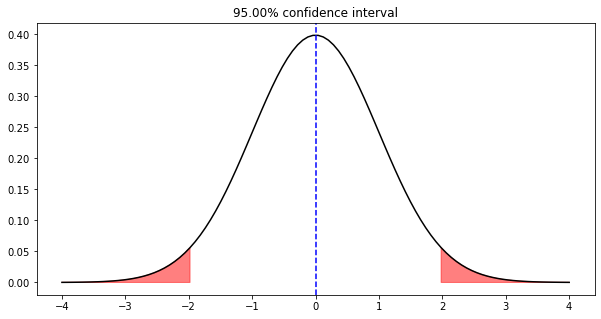

In [3]:
# 95% confidence interval
Z = 1.96

x = np.linspace(-4, 4, 100)
normal = norm.pdf(x)

fig, ax = plt.subplots(
    1, 1,
    figsize=(10, 5),
)

ax.plot(x, normal, color='black')

# dashed line for mean
ax.axvline(
    x=0,
    linestyle='dashed',
    color='blue',
    alpha=1.0
)

probability = norm.cdf(Z) - norm.cdf(-Z)

ax.set_title(
    f'{probability*100:.2f}% confidence interval'
)

area_to_shade = (x > Z) | (x < -Z)

ax.fill_between(
    x, normal,
    where=area_to_shade,
    alpha=0.5,
    color='red'
)

In [4]:
# 1-alpha = 0.95
# alpha = 0.05
# alpha_2 = 0.025

# The critical value for a two-tailed test
# with a 0.025 area in each tail is 1 - 0.025 = 0.975 

z_alpha_2 = norm.ppf(0.975)
print(f'z_alpha_2: {z_alpha_2}')
# probability
probability = norm.cdf(z_alpha_2) - norm.cdf(-1*z_alpha_2)
print(f'probability: {probability*100:.2f}%')

z_alpha_2: 1.959963984540054
probability: 95.00%


In [5]:
# 90% -> Z = 1,645
# 95% -> Z = 1.96
#########################
# 99% -> Z = 2.576
# 1-alpha = 0.99
# alpha = 0.01
# alpha_2 = 0.005

# The critical value for a two-tailed test
# with a 0.005 area in each tail is 1 - 0.005 = 0.995 
z_alpha_2 = norm.ppf(0.995)
print(f'z_alpha_2: {z_alpha_2:.2f}')
# probability
probability = norm.cdf(z_alpha_2) - norm.cdf(-1*z_alpha_2)
print(f'probability: {probability*100:.2f}%')

z_alpha_2: 2.58
probability: 99.00%


In [6]:
(58 - 1.96*6/5, 58 + 1.96*6/5)

(55.648, 60.352)

### Confidence intervals for the mean:
* Unknown standard deviation
* Unknown population

$$\bar{x} \pm t_{\frac{\alpha}{2},n-1} \frac{s}{\sqrt{n}}$$

In [7]:
# 1-alpha = 0.95
# alpha = 0.05
# alpha_2 = 0.025

# The critical value for a two-tailed test
# with a 0.025 area in each tail is 1 - 0.025 = 0.975 
df = 25-1
t_alpha_2 = t.ppf(0.975, df=df)
print(f't_alpha_2: {t_alpha_2:.2f}')
# probability
probability = t.cdf(t_alpha_2, df=df) - t.cdf(-1*t_alpha_2, df=df)
print(f'probability: {probability*100:.2f}%')

t_alpha_2: 2.06
probability: 95.00%


In [8]:
# 95% confidence interval
x_bar = 0.65
t_alpha_2 = 2.06
n = 100
s = 0.1
(x_bar - t_alpha_2*s/np.sqrt(n), x_bar + t_alpha_2*s/np.sqrt(n))

(0.6294000000000001, 0.6706)

### Confidence intervals for a proportion

$$\hat{p} \pm Z_{\frac{\alpha}{2}} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

In [9]:
# De una muestra de 100 pruebas aleatorias de alcoholemia, 10 conductores dieron positivo. Hallar un intervalo de confianza (95%) para la verdadera proporción de conductores en Chile que van curados.

p = 10/100
Z = 1.96
n = 100
interval = (p - Z*np.sqrt(p*(1-p)/n), p + Z*np.sqrt(p*(1-p)/n))
[100*i for i in interval]

[4.12, 15.879999999999999]

### Sample size for finite population

$$n = \frac{N * p * (1-p) * Z^2}{(N-1) * e^2 + p * (1-p) * Z^2}$$

where:
* $n$: sample size
* $N$: population size
* $p$: expected proportion in the population
* $Z$: critical value from the standard normal distribution for the desired level of confidence
* $e$: desired margin of error

In [10]:
# Supongamos que nos piden calcular el tamaño para una población de 543.098 consumidores de una marca de bebidas energéticas, donde el investigador asigna un nivel de confianza de 95% y un margen de error de 3%. Donde se desconoce la probabilidad “p” del evento.

Z = 1.96
N = 543098
e = 0.03
p = 0.5
n = (Z**2*p*(1-p)*N)/(e**2*(N-1) + Z**2*p*(1-p))
n = np.round(n)
n, 100*n/N

(1065.0, 0.19609720529259914)

### Sample size for infinite or unknown population

$$n = \frac{Z^2\cdot p\cdot(1-p)}{e^2}$$

where:
* $n$ is the sample size
* $z$ is the standard score associated with the desired level of confidence
* $p$ is the estimated proportion of the population with the attribute of interest
* $e$ is the desired margin of error (expressed as a proportion)


In [11]:
# Supongamos que nos piden calcular el tamaño para una población de 543.098 consumidores de una marca de bebidas energéticas, donde el investigador asigna un nivel de confianza de 95% y un margen de error de 3%. Donde se desconoce la probabilidad “p” del evento.

Z = 1.96
e = 0.03
p = 0.5
n = (Z**2*p*(1-p))/(e**2)
n = np.round(n)
n

1067.0

In [18]:
49/4

12.25

In [17]:
z_alpha_2 = norm.ppf(0.999999999995)
print(f'z_alpha_2: {z_alpha_2:.2f}')
# probability
probability = norm.cdf(z_alpha_2) - norm.cdf(-1*z_alpha_2)
print(f'probability: {probability*100}%')

z_alpha_2: 6.81
probability: 99.999999999%


## Bonus: t-distribution

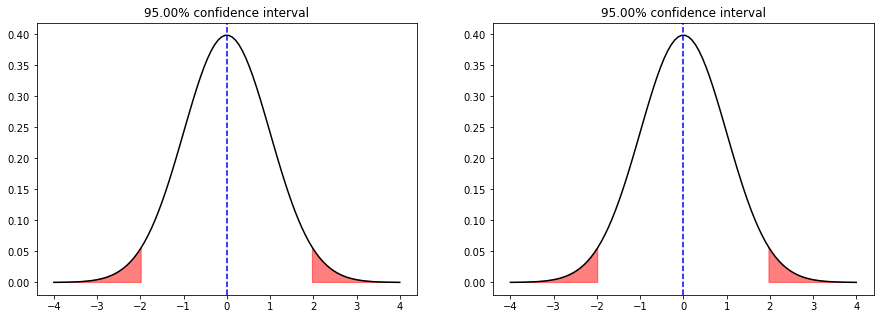

In [12]:
confidence_interval = 1.96

x = np.linspace(-4, 4, 100)
df = 1000000-1
# Normal distribution
normal = norm.pdf(x)
t_dist = t.pdf(x, df=df)

fig, axs = plt.subplots(
    1, 2,
    figsize=(15, 5),
)

axs[0].plot(x, normal, color='black')

# dashed line for mean
axs[0].axvline(
    x=0,
    linestyle='dashed',
    color='blue',
    alpha=1.0
)

probability = norm.cdf(confidence_interval)
probability -= norm.cdf(-1*confidence_interval)

axs[0].set_title(
    f'{probability*100:.2f}% confidence interval'
)

area_to_shade = x > confidence_interval
area_to_shade |= x < -1*confidence_interval

axs[0].fill_between(
    x, normal,
    where=area_to_shade,
    alpha=0.5,
    color='red'
)

# T distribution

axs[1].plot(x, t_dist, color='black')

# dashed line for mean
axs[1].axvline(
    x=0,
    linestyle='dashed',
    color='blue',
    alpha=1.0
)

probability = t.cdf(confidence_interval, df=df)
probability -= t.cdf(-1*confidence_interval, df=df)

axs[1].set_title(
    f'{probability*100:.2f}% confidence interval'
)

area_to_shade = x > confidence_interval
area_to_shade |= x < -1*confidence_interval

axs[1].fill_between(
    x, t_dist,
    where=area_to_shade,
    alpha=0.5,
    color='red'
)